# 이미지 데이터 셋을 이용한 CNN Modeling

> ## Google Drive Mount

## Logo Image_Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import Tensorflow & Keras

In [2]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [3]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')
!nvidia-smi


GPU Information - /device:GPU:0 

Tue Mar 23 04:26:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    32W / 250W |    349MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [4]:
import keras

keras.__version__

'2.4.3'

# I. Google Drive Mount

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# 마운트 결과 확인
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'

-rw------- 1 root root 12929865 Mar  4 04:42 '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'


# II. Data Preprocessing

> ## 1) Unzip 'Logo_Data.zip'


In [7]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Logo_Data.zip


Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip
  inflating: test/Adidas/4606245138.jpg  
 extracting: test/Adidas/Adidas_17.png  
 extracting: test/Adidas/Adidas_18.png  
 extracting: test/Adidas/Adidas_20.png  
 extracting: test/Adidas/Adidas_4.png  
 extracting: test/Adidas/Adidas_6.png  
 extracting: test/Adidas/Adidas_7.png  
  inflating: test/Apple/4748791597.jpg  
  inflating: test/Apple/Apple_10.jpg  
 extracting: test/Apple/Apple_12.png  
 extracting: test/Apple/Apple_14.png  
 extracting: test/Apple/Apple_16.png  
 extracting: test/Apple/Apple_18.png  
 extracting: test/Apple/Apple_20.png  
  inflating: test/BMW/3744679341.jpg  
  inflating: test/BMW/BMW_11.jpg     
  inflating: test/BMW/BMW_14.jpg     
  inflating: test/BMW/BMW_17.jpg     
  inflating: test/BMW/BMW_8.jpg      
  inflating: test/Citroen/2588612032.jpg  
  inflating: test/Citroen/Citroen_1.jpg  
  inflating: test/Citroen/Citroen_11.jpg  
 extracting: test/Citroen/Citroen_15.png  
 extr

> ## 2) Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [50]:
train_dir = 'train'
valid_dir = 'test'
test_dir = 'test'

> ## 3) ImageDataGenerator() & flow_from_directory()

* Normalization
  * ImageDataGenerator()
* Resizing & Generator
  * flow_from_directory()

In [51]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (75, 75),
                  batch_size = 8,
                  class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (75, 75),
                  batch_size = 8,
                  class_mode = 'categorical')


Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


> ## 4) Test train_generator

In [52]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기:', data_batch.shape)
  print('배치 레이블 크기:', labels_batch.shape)
  break

배치 데이터 크기: (8, 75, 75, 3)
배치 레이블 크기: (8, 27)


# III. CNN Keras Modeling

> ## 1) Model Define

In [53]:
# Feature Extraction & Classification
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (75, 75, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(27, activation = 'softmax'))

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)             

> ## 2) Model Compile

In [55]:
# 모델 학습방법 설정
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

In [57]:
%%time
Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 62,
                       epochs = 200,
                       validation_data = valid_generator,
                       validation_steps = 22)

Epoch 1/200
62/62 [==============================] - 1s 15ms/step - loss: 2.5547 - accuracy: 0.2653 - val_loss: 2.2394 - val_accuracy: 0.4205
Epoch 2/200
62/62 [==============================] - 1s 14ms/step - loss: 1.6714 - accuracy: 0.5408 - val_loss: 2.2374 - val_accuracy: 0.4545
Epoch 3/200
62/62 [==============================] - 1s 14ms/step - loss: 1.0606 - accuracy: 0.6898 - val_loss: 1.8691 - val_accuracy: 0.5511
Epoch 4/200
62/62 [==============================] - 1s 14ms/step - loss: 0.6156 - accuracy: 0.8245 - val_loss: 2.0336 - val_accuracy: 0.5057
Epoch 5/200
62/62 [==============================] - 1s 14ms/step - loss: 0.4014 - accuracy: 0.8939 - val_loss: 2.1848 - val_accuracy: 0.5739
Epoch 6/200
62/62 [==============================] - 1s 15ms/step - loss: 0.2894 - accuracy: 0.9327 - val_loss: 2.2734 - val_accuracy: 0.5227
Epoch 7/200
62/62 [==============================] - 1s 14ms/step - loss: 0.2323 - accuracy: 0.9408 - val_loss: 2.3457 - val_accuracy: 0.5682
Epoch 

> ## 4) 학습 결과 시각화

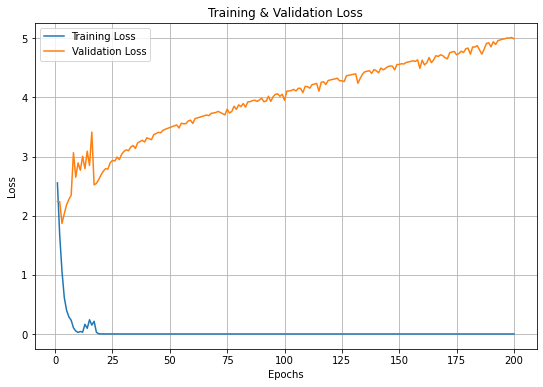

In [58]:
# Loss Visualization
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

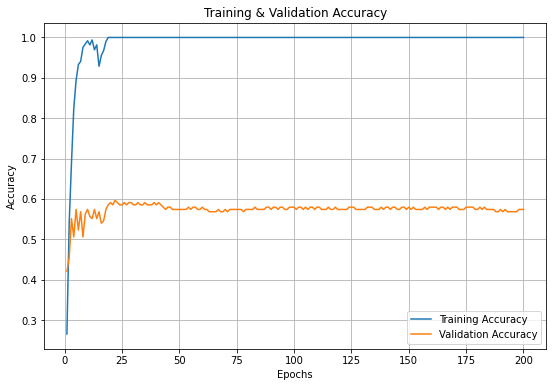

In [59]:
# Accuracy Visualization
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()


> ## 5) Model Evaluate

In [67]:
# test_generator
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (75, 75),
    batch_size = 8,
    class_mode = 'categorical')

Found 177 images belonging to 27 classes.


In [68]:
# Loss & Accuracy
loss, accuracy = model.evaluate(test_generator,
                                steps = 22)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

22/22 [==============================] - 0s 10ms/step - loss: 5.0373 - accuracy: 0.5682
Loss = 5.03725
Accuracy = 0.56818


# IV. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [69]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> ## 2) Model Save

In [70]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 38980
-rw------- 1 root root    34592 Mar 17 07:36 001_Model_iris.h5
-rw------- 1 root root 39879924 Mar 23 04:48 002_dogs_and_cats_small.h5


> ## 3) Model Load

In [71]:
from keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

loss, accuracy = model_small.evaluate(test_generator,
                                      steps = 22)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

22/22 [==============================] - 0s 10ms/step - loss: 4.9624 - accuracy: 0.5739
Loss = 4.96242
Accuracy = 0.57386
